<a href="https://colab.research.google.com/github/panghanwu/tibame_project/blob/main/NetworkX_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Reference](https://networkx.org/documentation/stable/tutorial.html)

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

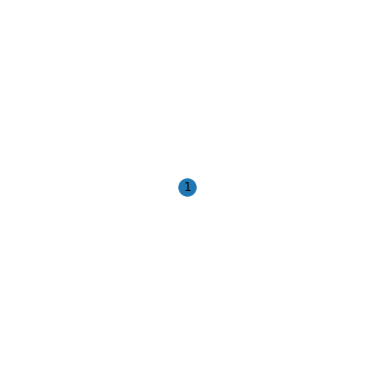

In [2]:
G = nx.Graph()

G.add_node(1)

plt.figure(figsize=(5,5))
nx.draw(G, with_labels=True)

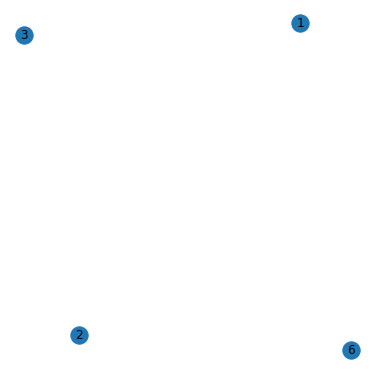

In [3]:
G.add_nodes_from([2, 3, 6])

plt.figure(figsize=(5,5))
nx.draw(G, with_labels=True)

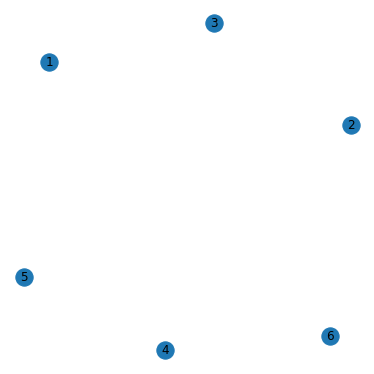

In [4]:
G.add_nodes_from([
  (4, {'color': 'red'}),
  (5, {'color': 'green'})
])

plt.figure(figsize=(5,5))
nx.draw(G, with_labels=True)

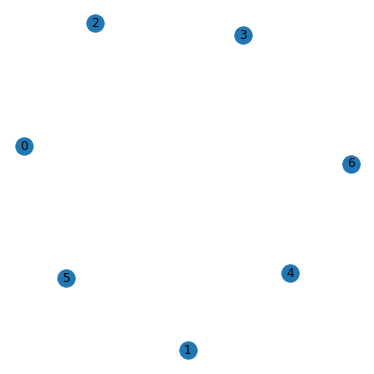

In [5]:
# add from other graph
H = nx.path_graph(7)
G.add_nodes_from(H)

plt.figure(figsize=(5,5))
nx.draw(G, with_labels=True)

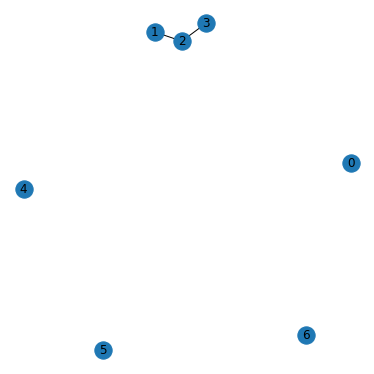

In [6]:
G.add_edge(1, 2)
e = (2, 3) 
G.add_edge(*e)  # unpack edge tuple

plt.figure(figsize=(5,5))
nx.draw(G, with_labels=True)

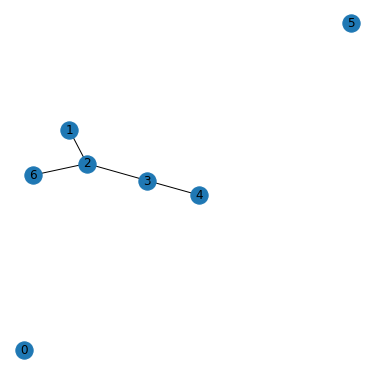

In [7]:
G.add_edges_from([(3, 4), (2, 6)])

plt.figure(figsize=(5,5))
nx.draw(G, with_labels=True)

In [8]:
G.clear()

[1, 2, 3, 'spam', 's', 'p', 'a', 'm']


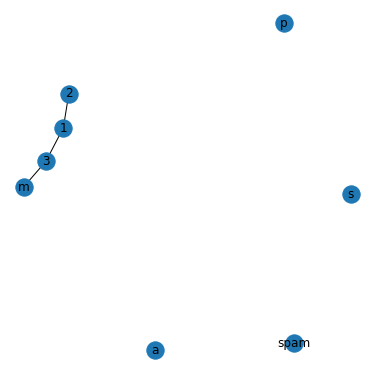

In [9]:
G.add_edges_from([(1, 2), (1, 3)])
G.add_node(1)
G.add_edge(1, 2)
G.add_node("spam")        # adds node "spam"
G.add_nodes_from("spam")  # adds 4 nodes: 's', 'p', 'a', 'm'
G.add_edge(3, 'm')

print(list(G.nodes))
plt.figure(figsize=(5,5))
nx.draw(G, with_labels=True)

In [10]:
G.remove_node(2)
G.remove_nodes_from("spam")

list(G.nodes)

[1, 3, 'spam']

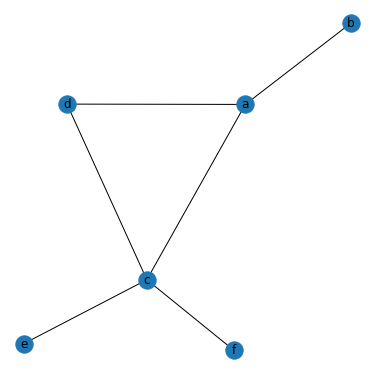

In [11]:
G.clear()

G = nx.Graph()
G.add_edge('a', 'b', weight=0.6)
G.add_edge('a', 'c', weight=0.2)
G.add_edge('c', 'd', weight=0.1)
G.add_edge('c', 'e', weight=0.7)
G.add_edge('c', 'f', weight=0.9)
G.add_edge('a', 'd', weight=0.3)

plt.figure(figsize=(5,5))
nx.draw(G, with_labels=True)

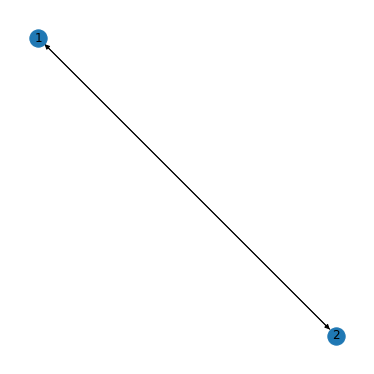

In [12]:
"""Constructors"""
G.clear()

G.add_edge(1, 2)
H = nx.DiGraph(G)   # create a DiGraph using the connections from g

plt.figure(figsize=(5,5))
nx.draw(H, with_labels=True)

In [13]:
"""Edges and neighbors"""
G.clear()

G = nx.Graph([(1, 2, {"color": "yellow"})])

print(G.adj[1])
print(G.adj[1][2])
print(G.edges[1, 2])

{2: {'color': 'yellow'}}
{'color': 'yellow'}
{'color': 'yellow'}


In [14]:
G.add_edge(1, 3)
G[1][3]['color'] = "blue"
G.edges[1, 2]['color'] = "red"

print(G.edges[1, 2])
print(G.edges[1, 3])

{'color': 'red'}
{'color': 'blue'}


In [15]:
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), 
              (1, 3, 0.75), 
              (2, 4, 1.2), 
              (3, 4, 0.375)])

FG.adj.items()

ItemsView(AdjacencyView({1: {2: {'weight': 0.125}, 3: {'weight': 0.75}}, 2: {1: {'weight': 0.125}, 4: {'weight': 1.2}}, 3: {1: {'weight': 0.75}, 4: {'weight': 0.375}}, 4: {2: {'weight': 1.2}, 3: {'weight': 0.375}}}))

In [16]:
for n, nbrs in FG.adj.items():
  for nbr, eattr in nbrs.items():
    wt = eattr['weight']
    if wt < 0.5: print(f"({n}, {nbr}, {wt:.3})")

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


In [17]:
for (u, v, wt) in FG.edges.data('weight'):
  if wt < 0.5:
    print(f"({u}, {v}, {wt:.3})")

(1, 2, 0.125)
(3, 4, 0.375)


In [18]:
"""Node attributes"""

G = nx.Graph(day="Friday")
G.graph

{'day': 'Friday'}

In [19]:
G.graph['day'] = "Monday"
G.graph

{'day': 'Monday'}

In [20]:
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')

print(G.nodes[1], G.nodes[3])

{'time': '5pm'} {'time': '2pm'}


In [21]:
G.nodes[1]['room'] = 714
G.nodes.data()

NodeDataView({1: {'time': '5pm', 'room': 714}, 3: {'time': '2pm'}})

In [22]:
"""Edge Attributes"""

G.add_edge(1, 2, weight=4.7)
G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])
G[1][2]['weight'] = 4.7
G.edges[3, 4]['weight'] = 4.2

print(G.edges)
print(G.edges[(1, 2)])

[(1, 2), (3, 4), (3, 2), (4, 5)]
{'weight': 4.7, 'color': 'blue'}


In [23]:
"""Directed graphs"""

DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])

print(DG.out_degree(1, weight='weight')
   ,DG.degree(1, weight='weight'))
print(list(DG.successors(1))
   ,list(DG.predecessors(1)))

0.5 1.25
[2] [3]


In [24]:
# transform to undirected graph
H = nx.Graph(DG)

[Example](https://networkx.org/documentation/stable/auto_examples/index.html)

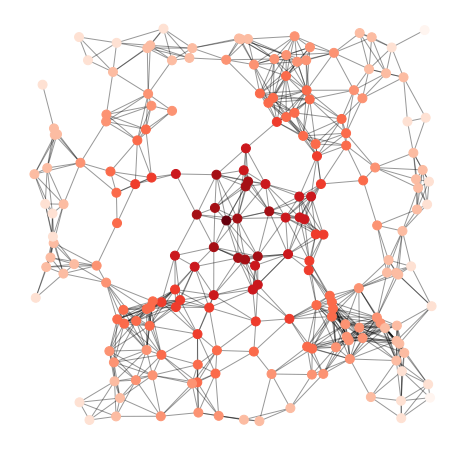

In [25]:
"""Example"""

G = nx.random_geometric_graph(200, 0.125)
# position is stored as node attribute data for random_geometric_graph
pos = nx.get_node_attributes(G, "pos")

# find node near center (0.5,0.5)
dmin = 1
ncenter = 0
for n in pos:
    x, y = pos[n]
    d = (x - 0.5) ** 2 + (y - 0.5) ** 2
    if d < dmin:
        ncenter = n
        dmin = d

# color by path length from node near center
p = dict(nx.single_source_shortest_path_length(G, ncenter))

plt.figure(figsize=(8, 8))
nx.draw_networkx_edges(G, pos, nodelist=[ncenter], alpha=0.4)
nx.draw_networkx_nodes(
    G,
    pos,
    nodelist=list(p.keys()),
    node_size=80,
    node_color=list(p.values()),
    cmap=plt.cm.Reds_r,
)

plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.axis("off")
plt.show()

['Hüsker Dü', 'Motörhead', 'Mötley Crüe', 'Spın̈al Tap', 'Blue Öyster Cult', 'Deathtöngue', 'Queensrÿche']


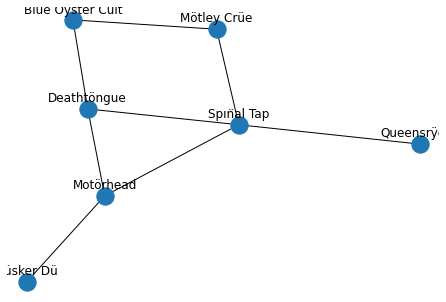

In [26]:
hd = "H" + chr(252) + "sker D" + chr(252)
mh = "Mot" + chr(246) + "rhead"
mc = "M" + chr(246) + "tley Cr" + chr(252) + "e"
st = "Sp" + chr(305) + "n" + chr(776) + "al Tap"
q = "Queensr" + chr(255) + "che"
boc = "Blue " + chr(214) + "yster Cult"
dt = "Deatht" + chr(246) + "ngue"

G = nx.Graph()
G.add_edge(hd, mh)
G.add_edge(mc, st)
G.add_edge(boc, mc)
G.add_edge(boc, dt)
G.add_edge(st, dt)
G.add_edge(q, st)
G.add_edge(dt, mh)
G.add_edge(st, mh)

# write in UTF-8 encoding
fh = open("edgelist.utf-8", "wb")
nx.write_multiline_adjlist(G, fh, delimiter="\t", encoding="utf-8")

# read and store in UTF-8
fh = open("edgelist.utf-8", "rb")
H = nx.read_multiline_adjlist(fh, delimiter="\t", encoding="utf-8")

for n in G.nodes():
    if n not in H:
        print(False)

print(list(G.nodes()))

pos = nx.spring_layout(G)
nx.draw(G, pos, font_size=16, with_labels=False)
for p in pos:  # raise text positions
    pos[p][1] += 0.07
nx.draw_networkx_labels(G, pos)
plt.show()

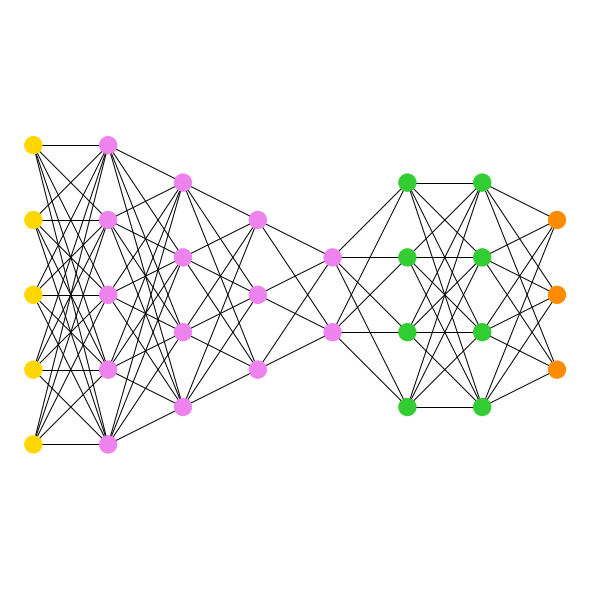

In [27]:
import itertools
from networkx.utils import pairwise

subset_sizes = [5, 5, 4, 3, 2, 4, 4, 3]
subset_color = [
    "gold",
    "violet",
    "violet",
    "violet",
    "violet",
    "limegreen",
    "limegreen",
    "darkorange",
]


def multilayered_graph(*subset_sizes):
    extents = pairwise(itertools.accumulate((0,) + subset_sizes))
    layers = [range(start, end) for start, end in extents]
    G = nx.Graph()
    for (i, layer) in enumerate(layers):
        G.add_nodes_from(layer, layer=i)
    for layer1, layer2 in pairwise(layers):
        G.add_edges_from(itertools.product(layer1, layer2))
    return G


G = multilayered_graph(*subset_sizes)
color = [subset_color[data["layer"]] for v, data in G.nodes(data=True)]
pos = nx.multipartite_layout(G, subset_key="layer")
plt.figure(figsize=(8, 8))
nx.draw(G, pos, node_color=color, with_labels=False)
plt.axis("equal")
plt.show()

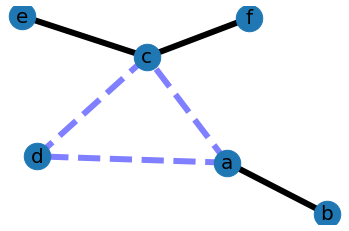

In [28]:
G = nx.Graph()

G.add_edge("a", "b", weight=0.6)
G.add_edge("a", "c", weight=0.2)
G.add_edge("c", "d", weight=0.1)
G.add_edge("c", "e", weight=0.7)
G.add_edge("c", "f", weight=0.9)
G.add_edge("a", "d", weight=0.3)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")

plt.axis("off")
plt.show()

Loaded miles_dat.txt containing 128 cities.
digraph has 128 nodes with 8128 edges


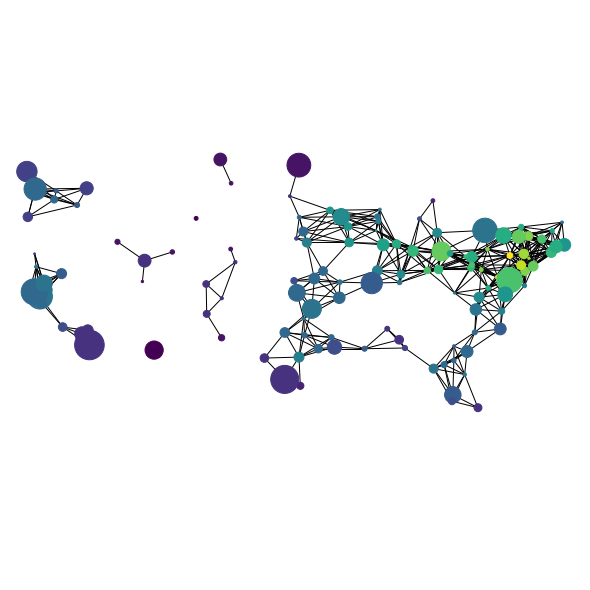

In [29]:
import gzip
import re

def miles_graph():
    """ Return the cites example graph in miles_dat.txt
        from the Stanford GraphBase.
    """
    # data: https://github.com/networkx/networkx/blob/master/examples/drawing/knuth_miles.txt.gz

    fh = gzip.open("knuth_miles.txt.gz", "r")

    G = nx.Graph()
    G.position = {}
    G.population = {}

    cities = []
    for line in fh.readlines():
        line = line.decode()
        if line.startswith("*"):  # skip comments
            continue

        numfind = re.compile(r"^\d+")

        if numfind.match(line):  # this line is distances
            dist = line.split()
            for d in dist:
                G.add_edge(city, cities[i], weight=int(d))
                i = i + 1
        else:  # this line is a city, position, population
            i = 1
            (city, coordpop) = line.split("[")
            cities.insert(0, city)
            (coord, pop) = coordpop.split("]")
            (y, x) = coord.split(",")

            G.add_node(city)
            # assign position - flip x axis for matplotlib, shift origin
            G.position[city] = (-int(x) + 7500, int(y) - 3000)
            G.population[city] = float(pop) / 1000.0
    return G


G = miles_graph()

print("Loaded miles_dat.txt containing 128 cities.")
print(f"digraph has {nx.number_of_nodes(G)} nodes with {nx.number_of_edges(G)} edges")

# make new graph of cites, edge if less then 300 miles between them
H = nx.Graph()
for v in G:
    H.add_node(v)
for (u, v, d) in G.edges(data=True):
    if d["weight"] < 300:
        H.add_edge(u, v)

# draw with matplotlib/pylab
plt.figure(figsize=(8, 8))
# with nodes colored by degree sized by population
node_color = [float(H.degree(v)) for v in H]
nx.draw(
    H,
    G.position,
    node_size=[G.population[v] for v in H],
    node_color=node_color,
    with_labels=False,
)

# scale the axes equally
plt.xlim(-5000, 500)
plt.ylim(-2000, 3500)

plt.show()